In [82]:
# Importing the necassary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [83]:
# Reading the dataset
dataset = pd.read_csv("co2emission.csv")
dataset.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [84]:
# Getting the dimensions
dataset.shape

(50598, 79)

In [85]:
# Selecting specific columns from the dataset
new_data = dataset[["country", "year", "co2_per_capita"]]

new_data.tail()

,country,year,co2_per_capita
50593,Zimbabwe,2017,0.651
50594,Zimbabwe,2018,0.784
50595,Zimbabwe,2019,0.724
50596,Zimbabwe,2020,0.677
50597,Zimbabwe,2021,0.706


In [86]:
europe = new_data[new_data["country"].isin(["Albania","Austria","Andorra","Armenia","Azerbaijan",
                                            "Belarus","Belgium","Bosnia and Herzegovina","Bulgaria",
                                            "Croatia","Cyprus","Czechia",
                                            "Denmark",
                                            "Estonia",
                                            "Finland","France",
                                            "Georgia","Germany","Greece",
                                            "Hungary",
                                            "Iceland","Ireland","Italy",
                                            "Kazakhstan","Kosovo",
                                            "Latvia","Liechtenstein","Lithuania","Luxembourg",
                                            "Malta","Moldova","Montenegro",
                                            "Netherlands","North Macedonia","Norway",
                                            "Poland","Portugal",
                                            "Romania","Russia",
                                            "Serbia","Slovakia","Spain","Sweden","Switzerland",
                                           "Turkey",
                                           "Ukraine", "United Kingdom"])]
europe.head()

,country,year,co2_per_capita
788,Albania,1850,NaN
789,Albania,1851,NaN
790,Albania,1852,NaN
791,Albania,1853,NaN
792,Albania,1854,NaN


In [87]:
# Filterig the dataframe
europe_data = europe.loc[(europe["year"] >= 1900)]
europe_data

,country,year,co2_per_capita
838,Albania,1900,NaN
839,Albania,1901,NaN
840,Albania,1902,NaN
841,Albania,1903,NaN
842,Albania,1904,NaN
...,...,...,...
47932,United Kingdom,2017,5.863
47933,United Kingdom,2018,5.716
47934,United Kingdom,2019,5.462
47935,United Kingdom,2020,4.865


In [88]:
# Checking mssing values
print(europe_data.isnull())
missing_counts = europe_data.isnull().sum()
print(missing_counts)

       country   year  co2_per_capita
838      False  False            True
839      False  False            True
840      False  False            True
841      False  False            True
842      False  False            True
...        ...    ...             ...
47932    False  False           False
47933    False  False           False
47934    False  False           False
47935    False  False           False
47936    False  False           False

[5734 rows x 3 columns]
country             0
year                0
co2_per_capita    426
dtype: int64


In [89]:
# Printing summary
europe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8708 entries, 788 to 47936
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         8708 non-null   object 
 1   year            8708 non-null   int64  
 2   co2_per_capita  7380 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.1+ KB


In [90]:
# Grouping dataframe by country
grouped = europe_data.groupby(['country'])
#Calculating the mean values for each group
mean_values = grouped.mean()
# Filling missing values with the mean
europe_data.loc[:,'co2_per_capita'] = grouped['co2_per_capita'].transform(lambda x: x.fillna(x.mean()))
europe_data

,country,year,co2_per_capita
838,Albania,1900,1.232888
839,Albania,1901,1.232888
840,Albania,1902,1.232888
841,Albania,1903,1.232888
842,Albania,1904,1.232888
...,...,...,...
47932,United Kingdom,2017,5.863000
47933,United Kingdom,2018,5.716000
47934,United Kingdom,2019,5.462000
47935,United Kingdom,2020,4.865000


In [91]:
# Grouping by 'year' and calculate the mean of 'co2_per_capita' within each year group
mean_by_year = europe_data.groupby('year')['co2_per_capita'].mean()

mean_by_year.head(10)

year
1900    2.395832
1901    2.375619
1902    2.365278
1903    2.400300
1904    2.419300
1905    2.426151
1906    2.514151
1907    2.627321
1908    2.707172
1909    2.663959
Name: co2_per_capita, dtype: float64

In [92]:
# Converting Series to DataFrame
df = mean_by_year.reset_index()

# Display the DataFrame
df

,year,co2_per_capita
0,1900,2.395832
1,1901,2.375619
2,1902,2.365278
3,1903,2.400300
4,1904,2.419300
...,...,...
117,2017,6.501851
118,2018,6.448809
119,2019,6.175596
120,2020,5.677936


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            122 non-null    int64  
 1   co2_per_capita  122 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


In [94]:
# Converting 'year' column to datetime format without considering it as a timestamp
df['year'] = pd.to_datetime(df['year'], format='%Y')

print(df)
print(df.dtypes)

          year  co2_per_capita
0   1900-01-01        2.395832
1   1901-01-01        2.375619
2   1902-01-01        2.365278
3   1903-01-01        2.400300
4   1904-01-01        2.419300
..         ...             ...
117 2017-01-01        6.501851
118 2018-01-01        6.448809
119 2019-01-01        6.175596
120 2020-01-01        5.677936
121 2021-01-01        5.756660

[122 rows x 2 columns]
year              datetime64[ns]
co2_per_capita           float64
dtype: object


In [95]:
# Calculating IQR for column 'co2_per_capita'
Q1 = df['co2_per_capita'].quantile(0.25)
Q3 = df['co2_per_capita'].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
threshold = 1.5
outliers = df[(df['co2_per_capita'] < Q1 - threshold * IQR) | (df['co2_per_capita'] > Q3 + threshold * IQR)]
print(outliers)


Empty DataFrame
Columns: [year, co2_per_capita]
Index: []


In [96]:
# Importing modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

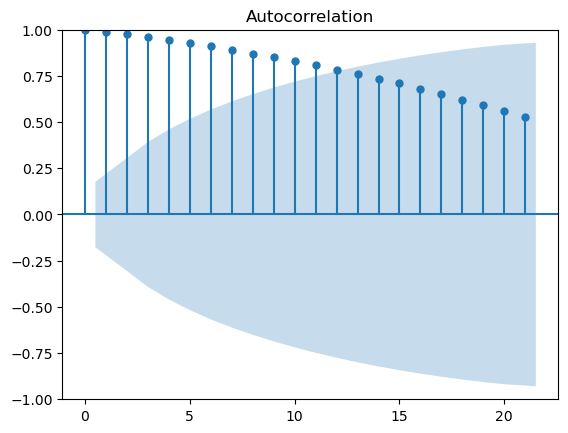

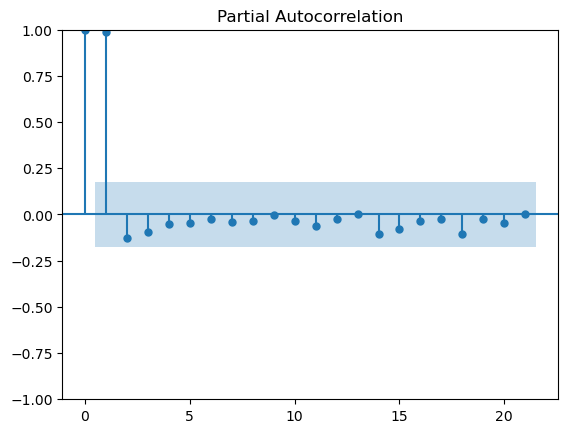

In [97]:
# Plotting ACF
acf_original = plot_acf((df['co2_per_capita']))
# Plotting PACF
pacf_original = plot_pacf((df['co2_per_capita']))

In [98]:
import statsmodels.api as sm

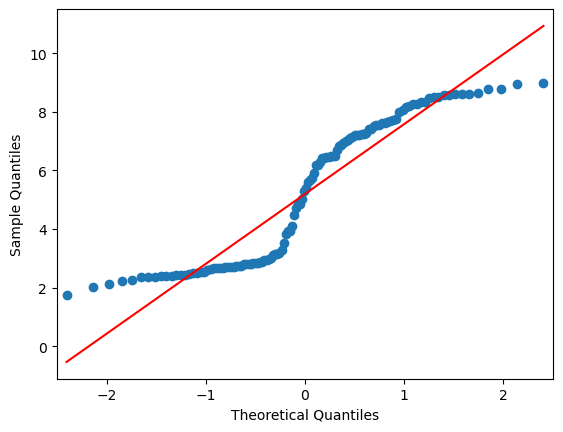

In [99]:
# Creating a Q_Q plot for the co2_per_capita_column
x = sm.qqplot(df['co2_per_capita'], line = 's')

In [100]:
# Performing the Augmented Dickey_fuller (ADF)
adftest = adfuller(df['co2_per_capita'])
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -1.1838322326020234
P-Value: 0.680511724082201
Number of lags: 1
Number of observations: 120
Critical Values: {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


In [101]:
# Importing ARIMA class
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [102]:
# Automatically selects the best ARIMA model
stepwise_fit = auto_arima(df['co2_per_capita'], trace = True,
                         suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15.347, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11.202, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17.991, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16.320, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11.407, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-17.301, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18.447, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-17.316, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17.241, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16.132, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-20.100, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17.019, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-18.949, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-19.161, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-19.0

In [103]:
# A nested loop is written to calculate the AIC values
# The lowest AIC the better

aic_values=[]
for d in range(0,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df['co2_per_capita'], order=(ari,d,maj))
                arima_obj_fit = arima_obj.fit()
                aic_values.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aic_values)

[[0, 0, 0, 562.4703268416656], [0, 0, 1, 412.59735871315297], [0, 0, 2, 294.84797259976744], [1, 0, 0, -3.6224074584299686], [1, 0, 1, -9.31018275543472], [1, 0, 2, -9.425985832748779], [2, 0, 0, -11.327132836982074], [2, 0, 1, -16.000370760513054], [2, 0, 2, -16.68535109248187], [0, 1, 0, -11.407116814033158], [0, 1, 1, -17.01855697648189], [0, 1, 2, -17.061730746043274], [1, 1, 0, -18.949477465863918], [1, 1, 1, -20.100000189567357], [1, 1, 2, -19.080918533634875], [2, 1, 0, -18.50468642417404], [2, 1, 1, -19.16081959265658], [2, 1, 2, -17.19444192838876], [0, 2, 0, 33.98112121683988], [0, 2, 1, -16.822927324755028], [0, 2, 2, -16.58741047615775], [1, 2, 0, 10.719914321615752], [1, 2, 1, -16.729951968758222], [1, 2, 2, -14.814095276190965], [2, 2, 0, 2.8059454275459483], [2, 2, 1, -14.81369222909511], [2, 2, 2, -12.84113511540037]]


import statsmodels.api as sm

In [104]:
# Storing one difference value of the 'co2 per capita' column
diffval = df['co2_per_capita'].diff(1)
# Dropping the first row of 'co2 per capita' column because It has 'NaN' value
diffval = df['co2_per_capita'].diff(1).dropna()


# Displaying the first five records
diffval.head()

1   -0.020213
2   -0.010340
3    0.035021
4    0.019000
5    0.006851
Name: co2_per_capita, dtype: float64

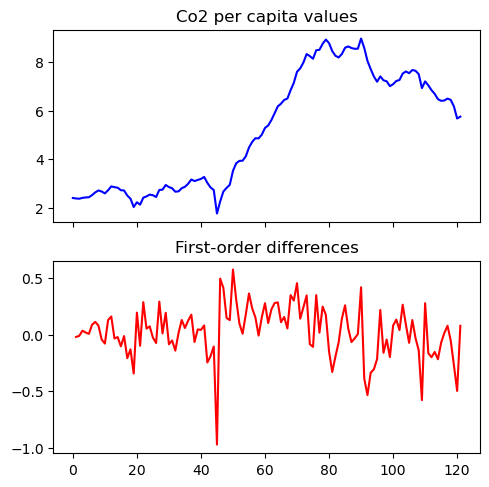

In [105]:
# Declaring the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df['co2_per_capita'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Co2 per capita values')
diffval.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences');

In [106]:
# Fitting the model
model = ARIMA(df['co2_per_capita'], order = (1, 1, 1))

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         co2_per_capita   No. Observations:                  122
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  13.050
Date:                Sat, 18 May 2024   AIC                            -20.100
Time:                        21:59:54   BIC                            -11.713
Sample:                             0   HQIC                           -16.694
                                - 122                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8537      0.128      6.687      0.000       0.603       1.104
ma.L1         -0.6816      0.149     -4.567      0.000      -0.974      -0.389
sigma2         0.0471      0.004     11.879      0.000       0.039       0.055
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                46.22
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               3.15   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
# Declaring the array 'pred' and append the values 
pred = model_fit.fittedvalues

# Adding a new column 'ARIMA' into dataframe
df['ARIMA'] = pred

# Add a column 'diffval' into dataframe
#df['diffval'] = diffval

# Display first five records
df.head(10)


,year,co2_per_capita,ARIMA
0,1900-01-01,2.395832,0.000000
1,1901-01-01,2.375619,2.395832
2,1902-01-01,2.365278,2.370785
3,1903-01-01,2.400300,2.360041
4,1904-01-01,2.419300,2.403302
5,1905-01-01,2.426151,2.424715
6,1906-01-01,2.514151,2.431025
7,1907-01-01,2.627321,2.532726
8,1908-01-01,2.707172,2.659513
9,1909-01-01,2.663959,2.742867


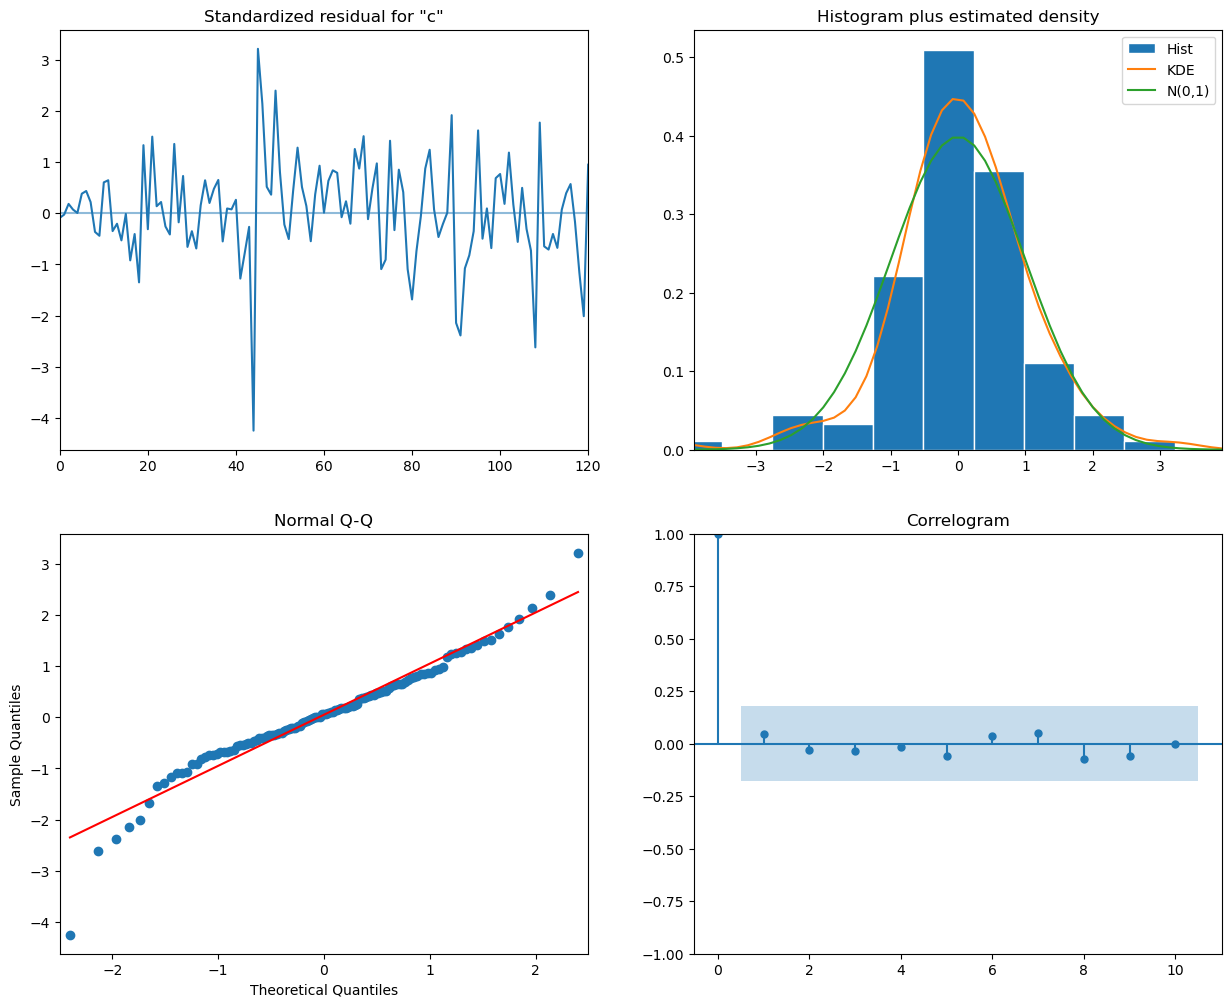

In [108]:
# Diagnosing the model residuals
model_fit.plot_diagnostics(figsize = (15, 12))
plt.show()

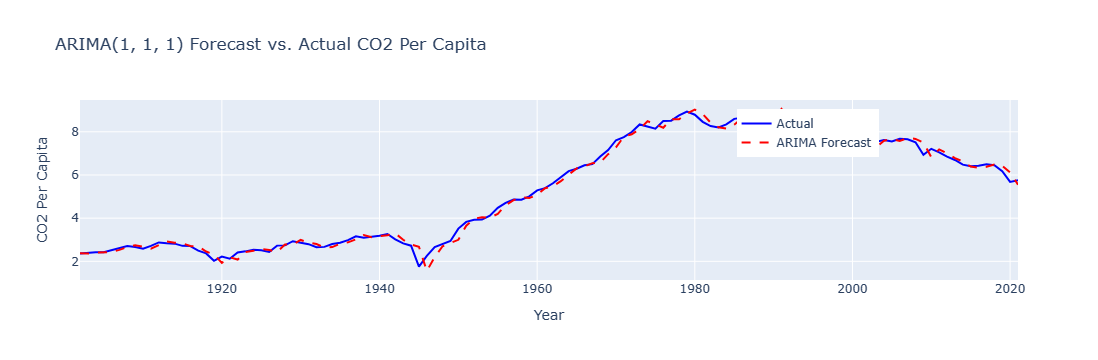

In [109]:
import plotly.graph_objs as go
# Set the index of the DataFrame to the 'Year' column
df.set_index('year', inplace=True)


# Create traces for actual and ARIMA forecast values
trace_actual = go.Scatter(x=df.index[2:], y=df['co2_per_capita'].iloc[2:], mode='lines', name='Actual', line=dict(color='blue'))
trace_arima = go.Scatter(x=df.index[2:], y=df['ARIMA'].iloc[2:], mode='lines', name='ARIMA Forecast', line=dict(color='red', dash='dash'))

# Create layout
layout = go.Layout(title='ARIMA(1, 1, 1) Forecast vs. Actual CO2 Per Capita',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='CO2 Per Capita'),
                   legend=dict(x=0.7, y=0.95))

# Combine traces and layout
fig = go.Figure(data=[trace_actual, trace_arima], layout=layout)

# Show plot
fig.show()


In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [111]:
# Split the data into train and test
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

In [112]:
# Another model selection
order_aic_bic = sm.tsa.arma_order_select_ic(train["co2_per_capita"].dropna(), ic=["aic", "bic"])
print(f"ARIMA Order (AIC): {order_aic_bic['aic_min_order']}")
print(f"ARIMA Order (BIC): {order_aic_bic['bic_min_order']}")

ARIMA Order (AIC): (2, 2)
ARIMA Order (BIC): (2, 1)


In [113]:
# Fit the ARIMA model on the training dataset
model_train_1 = ARIMA(train['co2_per_capita'], order=(1,1, 1))
model_train_fit_1 = model_train_1.fit()
model_train_fit_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         co2_per_capita   No. Observations:                   97
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   9.331
Date:                Sat, 18 May 2024   AIC                            -12.662
Time:                        22:01:59   BIC                             -4.969
Sample:                    01-01-1900   HQIC                            -9.552
                         - 01-01-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7422      0.179      4.146      0.000       0.391       1.093
ma.L1         -0.5027      0.208     -2.417      0.016      -0.910      -0.095
sigma2         0.0481      0.004     10.827      0.000       0.039       0.057
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.69
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

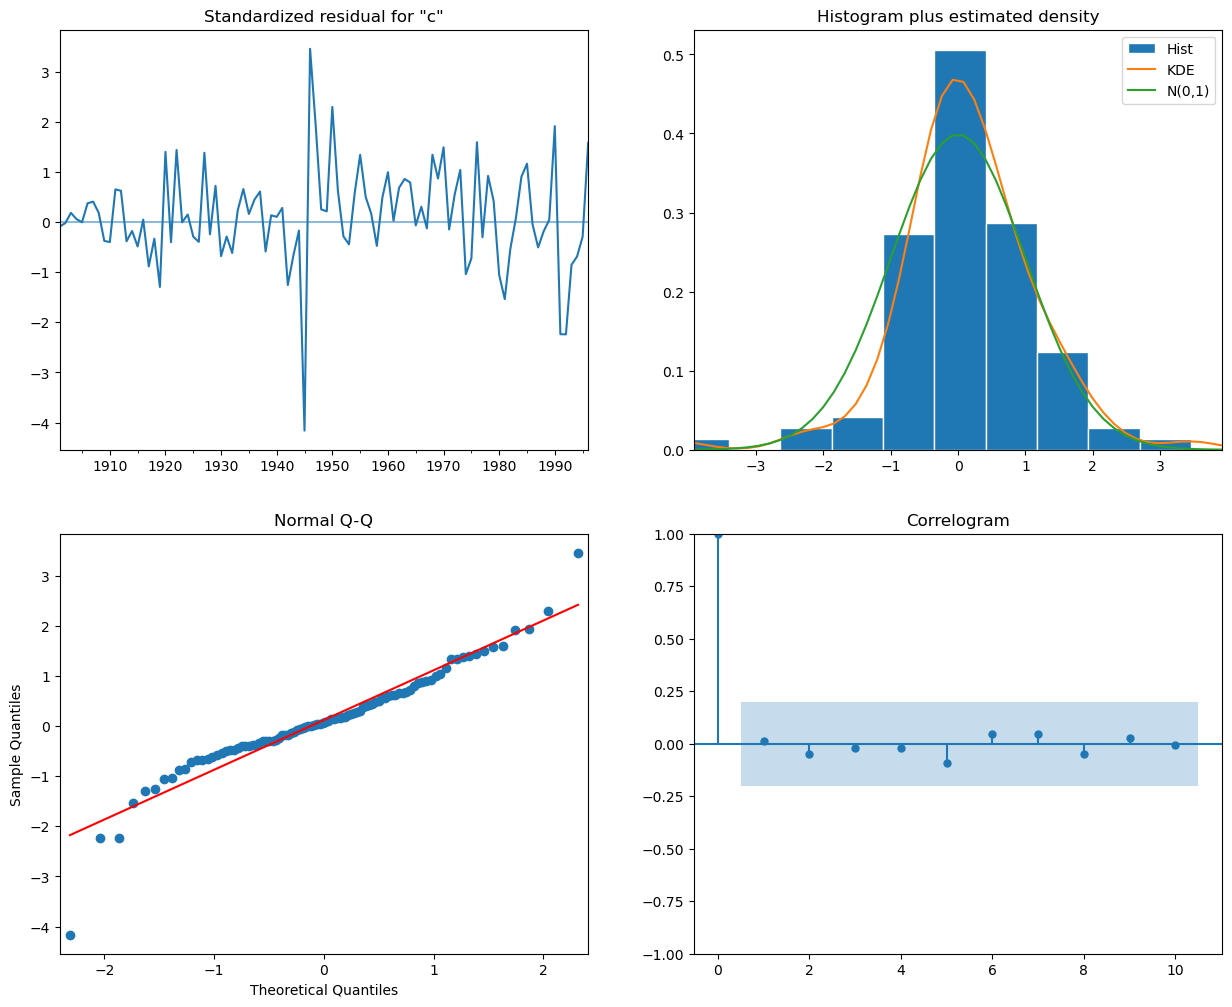

In [114]:
# Diagnosing the model residuals
model_train_fit_1.plot_diagnostics(figsize = (15, 12))
plt.show()

In [115]:
# Forecast on the test dataset
test_forecast_1 = model_train_fit_1.get_forecast(steps=len(test))
test_forecast_series_1 = pd.Series(test_forecast_1.predicted_mean, index=test.index)
test_forecast_series_1

year
1997-01-01    7.405289
1998-01-01    7.396415
1999-01-01    7.389828
2000-01-01    7.384940
2001-01-01    7.381311
2002-01-01    7.378618
2003-01-01    7.376620
2004-01-01    7.375136
2005-01-01    7.374035
2006-01-01    7.373218
2007-01-01    7.372612
2008-01-01    7.372161
2009-01-01    7.371827
2010-01-01    7.371579
2011-01-01    7.371395
2012-01-01    7.371259
2013-01-01    7.371157
2014-01-01    7.371082
2015-01-01    7.371026
2016-01-01    7.370985
2017-01-01    7.370954
2018-01-01    7.370931
2019-01-01    7.370914
2020-01-01    7.370902
2021-01-01    7.370892
Name: predicted_mean, dtype: float64

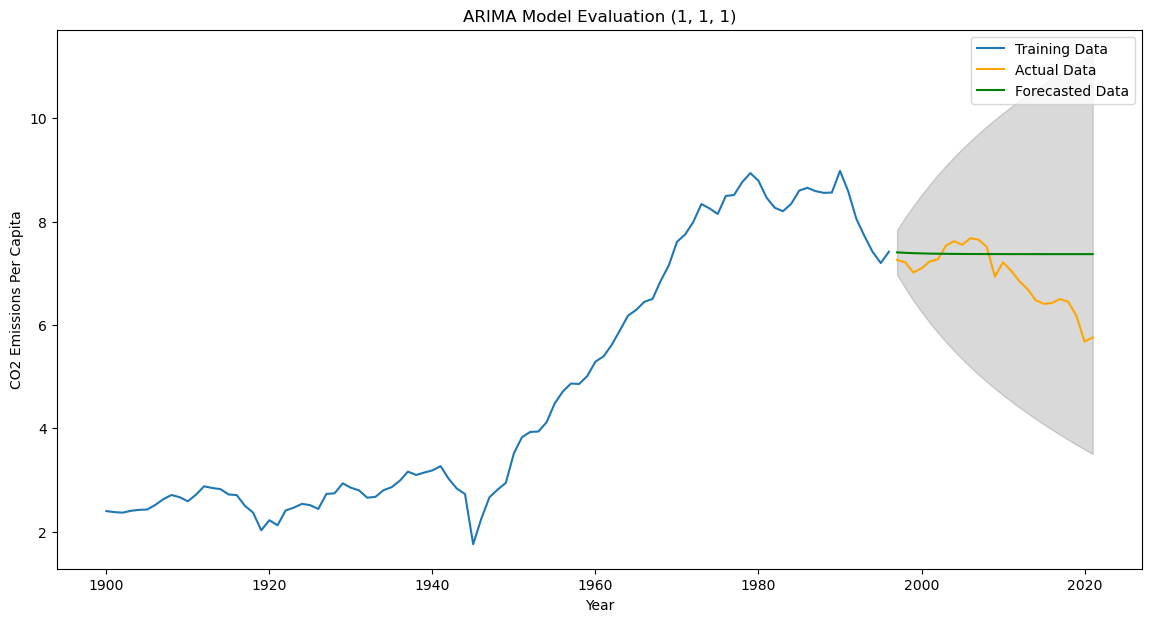

In [116]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['co2_per_capita'], label='Training Data')
plt.plot(test['co2_per_capita'], label='Actual Data', color='orange')
plt.plot(test_forecast_series_1, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast_1.conf_int().iloc[:, 0], 
                 test_forecast_1.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation (1, 1, 1)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()
plt.show()


In [117]:
# Declaring the array 'pred' and append the values 
pred_1 = model_train_fit_1.fittedvalues
pred_2 = model_train_fit_2.fittedvalues

# Adding a new column 'ARIMA' into dataframe
df['ARIMA 1 1 1'] = pred_1

# Add a column 'diffval' into dataframe
df['ARIMA 2 2 0'] = pred_2

# Display first five records
df.head(10).dropna()


,co2_per_capita,ARIMA,ARIMA 1 1 1,ARIMA 2 2 0
year,,,,
1900-01-01,2.395832,0.000000,0.000000,0.000000
1901-01-01,2.375619,2.395832,2.395832,3.593748
1902-01-01,2.365278,2.370785,2.369628,2.355406
1903-01-01,2.400300,2.360041,2.359730,2.350883
1904-01-01,2.419300,2.403302,2.406039,2.408824
1905-01-01,2.426151,2.424715,2.426747,2.434177
1906-01-01,2.514151,2.431025,2.431535,2.443790
1907-01-01,2.627321,2.532726,2.537935,2.562976
1908-01-01,2.707172,2.659513,2.666380,2.704905


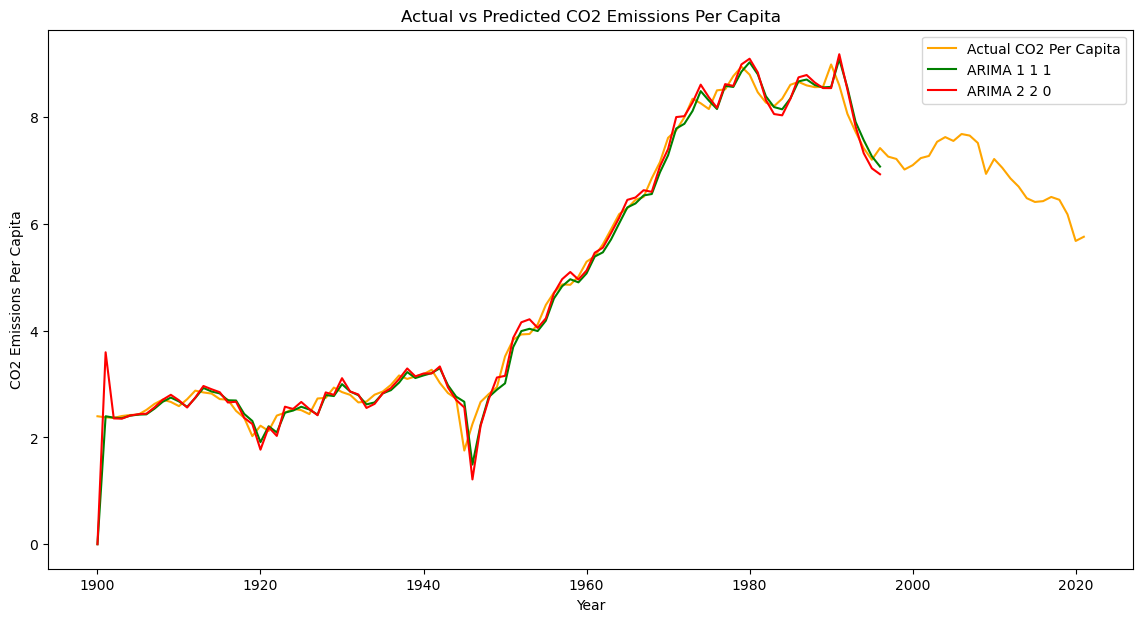

In [118]:
### # Plotting the DataFrame
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['co2_per_capita'], label='Actual CO2 Per Capita', color='orange')
plt.plot(df.index, df['ARIMA 1 1 1'], label='ARIMA 1 1 1', color='green')
plt.plot(df.index, df['ARIMA 2 2 0'], label='ARIMA 2 2 0', color='red')

# Add title and labels
plt.title('Actual vs Predicted CO2 Emissions Per Capita')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()

# Display the plot
plt.show()


In [119]:
# Fit the ARIMA model on the training dataset
model_train_2 = ARIMA(train['co2_per_capita'], order=(2,2, 0))
model_train_fit_2 = model_train_2.fit()
model_train_fit_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         co2_per_capita   No. Observations:                   97
Model:                 ARIMA(2, 2, 0)   Log Likelihood                   0.564
Date:                Sat, 18 May 2024   AIC                              4.872
Time:                        22:02:58   BIC                             12.534
Sample:                    01-01-1900   HQIC                             7.968
                         - 01-01-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5241      0.079     -6.624      0.000      -0.679      -0.369
ar.L2         -0.2760      0.138     -1.999      0.046      -0.547      -0.005
sigma2         0.0576      0.007      8.384      0.000       0.044       0.071
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                55.55
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               2.45   Skew:                             0.50
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

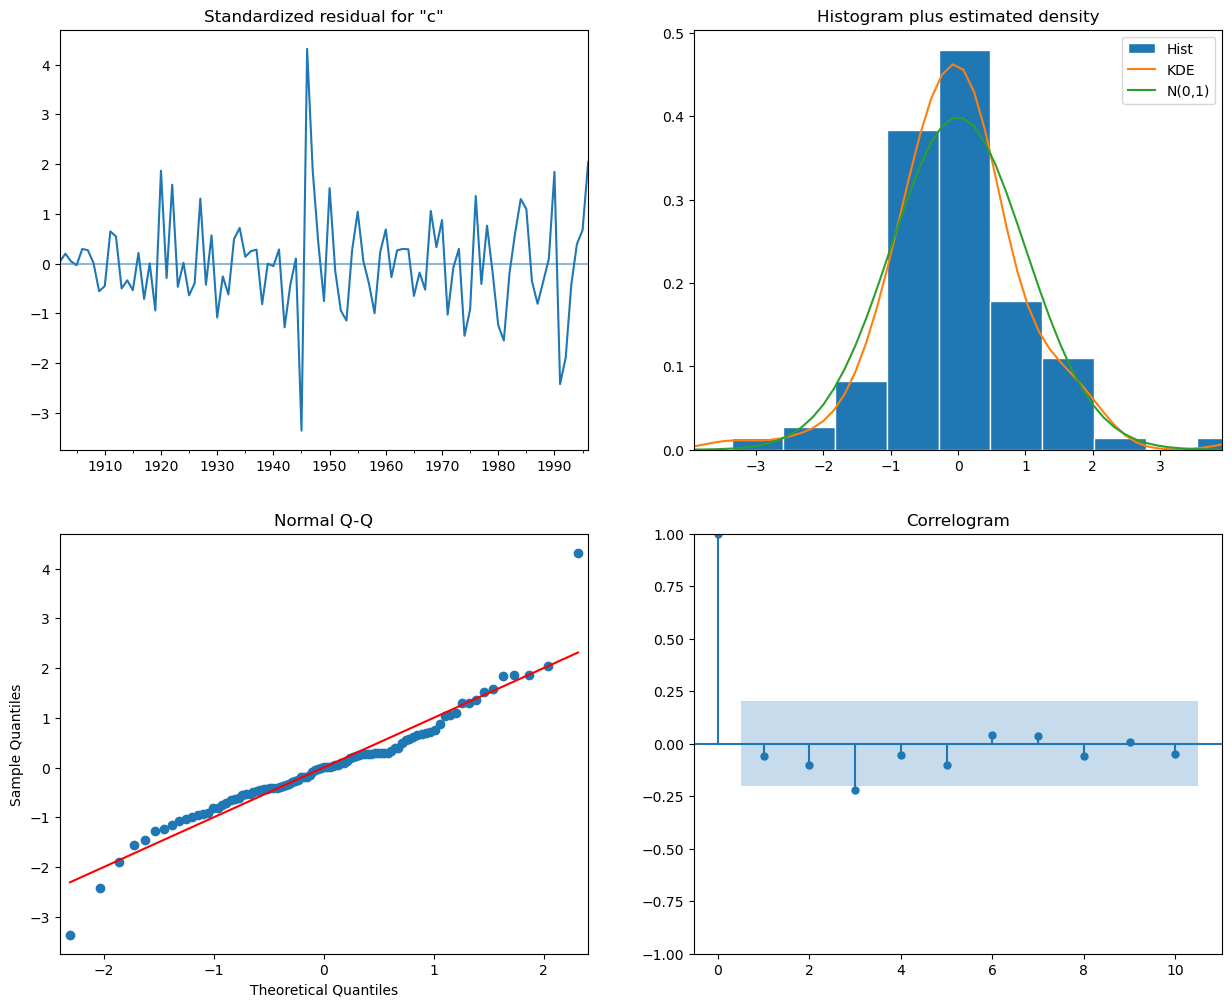

In [120]:
# Diagnosing the model residuals
model_train_fit_2.plot_diagnostics(figsize = (15, 12))
plt.show()

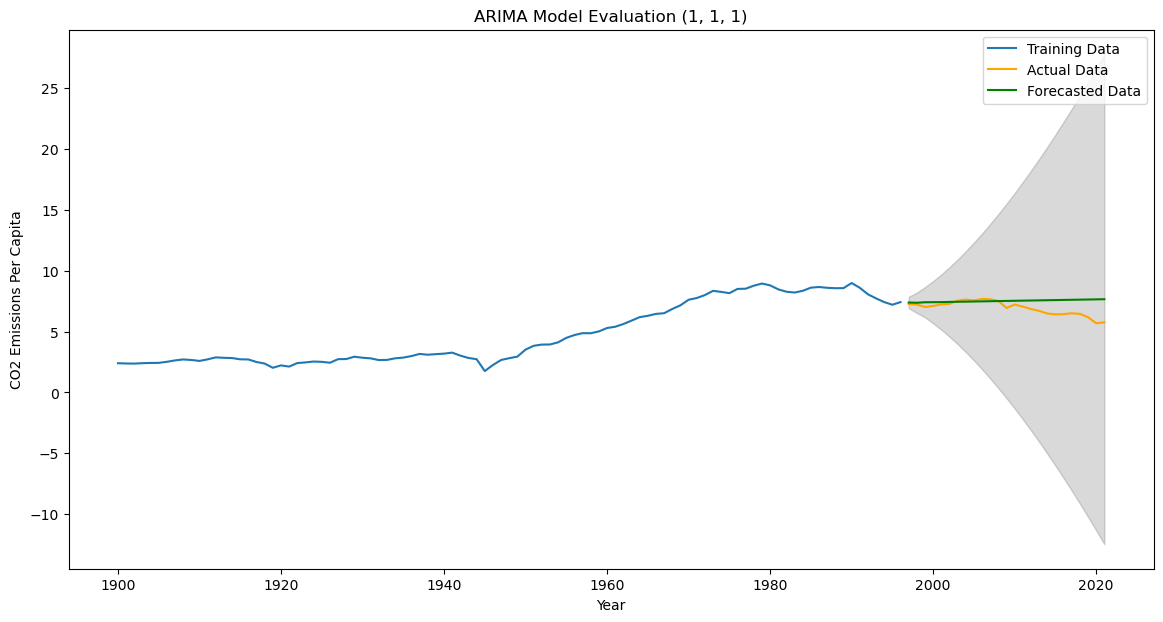

In [121]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['co2_per_capita'], label='Training Data')
plt.plot(test['co2_per_capita'], label='Actual Data', color='orange')
plt.plot(test_forecast_series_2, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast_2.conf_int().iloc[:, 0], 
                 test_forecast_2.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation (1, 1, 1)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()
plt.show()


In [38]:
# Forecast on the test dataset
test_forecast_2 = model_train_fit_2.get_forecast(steps=len(test))
test_forecast_series_2 = pd.Series(test_forecast_2.predicted_mean, index=test.index)
test_forecast_series_2

year
1997-01-01    7.383242
1998-01-01    7.361747
1999-01-01    7.403449
2000-01-01    7.408579
2001-01-01    7.415435
2002-01-01    7.431479
2003-01-01    7.442231
2004-01-01    7.453221
2005-01-01    7.465547
2006-01-01    7.477107
2007-01-01    7.488700
2008-01-01    7.500487
2009-01-01    7.512163
2010-01-01    7.523844
2011-01-01    7.535553
2012-01-01    7.547246
2013-01-01    7.558939
2014-01-01    7.570637
2015-01-01    7.582332
2016-01-01    7.594027
2017-01-01    7.605723
2018-01-01    7.617419
2019-01-01    7.629114
2020-01-01    7.640810
2021-01-01    7.652506
Name: predicted_mean, dtype: float64

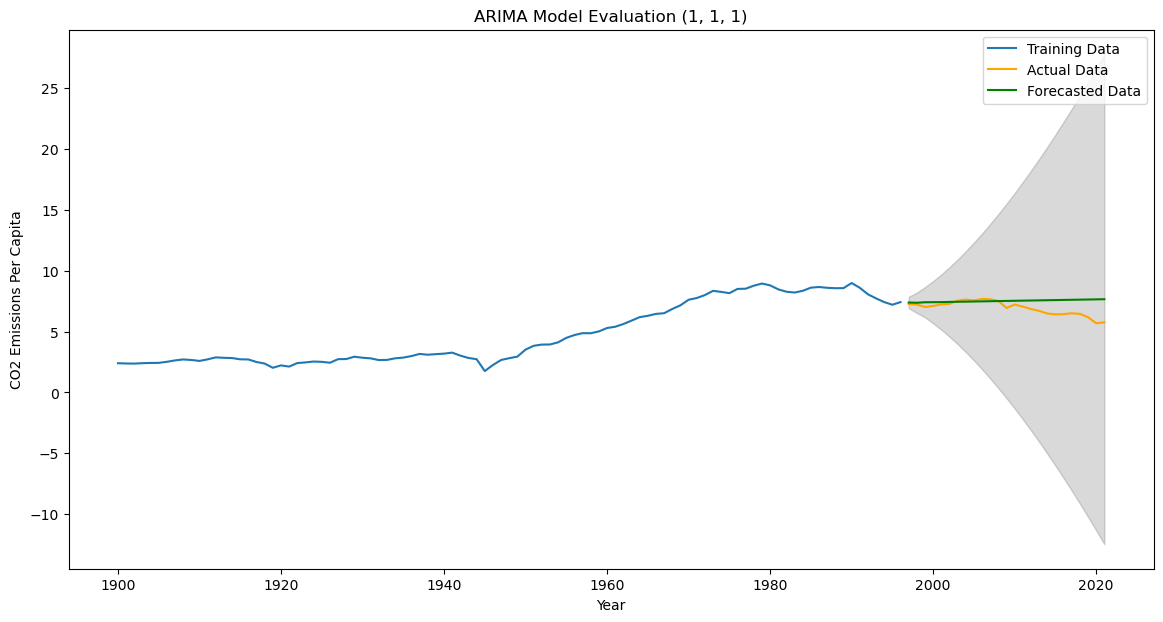

In [40]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['co2_per_capita'], label='Training Data')
plt.plot(test['co2_per_capita'], label='Actual Data', color='orange')
plt.plot(test_forecast_series_2, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast_2.conf_int().iloc[:, 0], 
                 test_forecast_2.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation (1, 1, 1)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()
plt.show()


In [128]:
# Calculate the mean squared error
mse_1 = mean_squared_error(test['co2_per_capita'], test_forecast_series_1)
# Print RMSE
print('Test MSE: %.3f' % mse_1)

# Calculate the mean absolute error
mae_1 = mean_absolute_error(test['co2_per_capita'], test_forecast_series_1)
# Print MAE
print('Test MAE: %.3f' % mae_1)

# Calculate the mean absolute error
rmse_1 = math.sqrt(mean_squared_error(test['co2_per_capita'], test_forecast_series_1))
# Print MAE
print('Test RMSE: %.3f' % rmse_1)

# Calculate the mean absolute error
mape_1 = np.mean(np.abs(test_forecast_series_1 - test['co2_per_capita'])/np.abs(test['co2_per_capita']))
# Print MAE
print('Test MAPE: %.3f' % mape_1)


Test MSE: 0.512
Test MAE: 0.551
Test RMSE: 0.716
Test MAPE: 0.086


In [129]:
# Calculate the mean squared error
mse_2 = mean_squared_error(test['co2_per_capita'], test_forecast_series_2)
# Print RMSE
print('Test MSE: %.3f' % mse_2)

# Calculate the mean absolute error
mae_2 = mean_absolute_error(test['co2_per_capita'], test_forecast_series_2)
# Print MAE
print('Test MAE: %.3f' % mae_2)

# Calculate the mean absolute error
rmse_2 = math.sqrt(mean_squared_error(test['co2_per_capita'], test_forecast_series_2))
# Print MAE
print('Test RMSE: %.3f' % rmse_2)

# Calculate the mean absolute error
mape_2 = np.mean(np.abs(test_forecast_series_2 - test['co2_per_capita'])/np.abs(test['co2_per_capita']))
# Print MAE
print('Test MAPE: %.3f' % mape_2)


Test MSE: 0.738
Test MAE: 0.640
Test RMSE: 0.859
Test MAPE: 0.100


In [ ]:

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
dataset_2 = pd.read_csv("co2emission.csv")
dataset_2.head()

In [ ]:
europe = dataset_2[dataset_2["country"].isin(["Albania","Austria","Andorra","Armenia","Azerbaijan",
                                            "Belarus","Belgium","Bosnia and Herzegovina","Bulgaria",
                                            "Croatia","Cyprus","Czechia",
                                            "Denmark",
                                            "Estonia",
                                            "Finland","France",
                                            "Georgia","Germany","Greece",
                                            "Hungary",
                                            "Iceland","Ireland","Italy",
                                            "Kazakhstan","Kosovo",
                                            "Latvia","Liechtenstein","Lithuania","Luxembourg",
                                            "Malta","Moldova","Montenegro",
                                            "Netherlands","North Macedonia","Norway",
                                            "Poland","Portugal",
                                            "Romania","Russia",
                                            "Serbia","Slovakia","Spain","Sweden","Switzerland",
                                           "Turkey",
                                           "Ukraine", "United Kingdom"])]
europe.head()

In [ ]:
europe_data = europe.loc[(europe["year"] >= 1900)]
europe_data

In [ ]:
new_data = europe_data[["country", "year", "population", "gdp", "cement_co2", "coal_co2", "co2_per_capita"]]

new_data.tail()

In [ ]:
# Group by 'year' and calculate the mean of 'co2_per_capita' within each year group
random_forest = europe_data.groupby('year')[['population','coal_co2', 'gdp', 'cement_co2', 'co2_per_capita']].mean().dropna()

# Display the first 10 means per year
random_forest.head(10)

In [ ]:
print(random_forest.isnull())

In [ ]:

import numpy as np
# Labels are the values we want to predict
labels = np.array(random_forest['co2_per_capita'])
# Remove the labels from the features
# axis 1 refers to the columns
random_forest= random_forest.drop('co2_per_capita', axis = 1)
# Saving feature names for later use
feature_list = list(random_forest.columns)
# Convert to numpy array
random_forest = np.array(random_forest)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(random_forest, labels, test_size = 0.25, random_state = 42)

In [ ]:
random_forest.shape

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
# Calculate the mean of the target variable
baseline_prediction = np.mean(test_features)

# Create an array of baseline predictions with the same length as the test set
baseline_predictions = np.full_like(test_features, fill_value=baseline_prediction)

#baseline_mse = mean_squared_error(test_features, baseline_predictions)
baseline_mae = mean_absolute_error(test_features, baseline_predictions)

# Print the rounded baseline MAE
print("Baseline MAE:", baseline_mae)

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

In [ ]:
print("Length of train_features:", len(train_features))
print("Length of train_labels:", len(train_labels))

In [ ]:
print('Predictions: ',predictions, 'Test Features: ', test_features) 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
# Import tools needed for visualization
#from sklearn.tree import export_graphviz
#import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [ ]:

# Pull out one tree from the forest
tree = rf.estimators_[5]

In [ ]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [ ]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:

# Assuming `rf` is your trained RandomForest model and `feature_list` is the list of feature names
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance, rounded to 2 decimal places
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# Extract the sorted features and their importance values
features, importances = zip(*feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))

# Create color gradient
colors = plt.cm.viridis(np.array(importances) / max(importances))

# Plot horizontal bar chart
bars = plt.barh(features, importances, color=colors)

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importances', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('cement_co2'), feature_list.index('population')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, predictions, edgecolors=(0, 0, 0))
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], 'r--')
plt.xlabel('Actual CO2 Per Capita')
plt.ylabel('Predicted CO2 Per Capita')
plt.title('Actual vs Predicted CO2 Per Capita')
plt.show()

In [ ]:
# Assuming you have the data in a DataFrame
data = {
    'Actual_CO2_Per_Capita': [7.256842, 7.213863, 7.015565, 7.095842, 7.229459, 7.269906, 7.534608, 7.622502, 7.550842, 7.680204, 7.650736, 7.512702, 6.934128, 7.212298, 7.047553, 6.848617, 6.695936, 6.478745, 6.408404, 6.423277, 6.501851, 6.448809, 6.175596, 5.677936, 5.756660],
    'Predicted_CO2_Per_Capita': [7.383242, 7.361747, 7.403449, 7.408579, 7.415435, 7.431479, 7.442231, 7.453221, 7.465547, 7.477107, 7.488700, 7.500487, 7.512163, 7.523844, 7.535553, 7.547246, 7.558939, 7.570637, 7.582332, 7.594027, 7.605723, 7.617419, 7.629114, 7.640810, 7.652506]
}
dates = pd.date_range(start='1997-01-01', periods=25, freq='Y')
df = pd.DataFrame(data, index=dates)

In [ ]:
model = ARIMA(df['Actual_CO2_Per_Capita'], order=(1, 1, 1))  # Adjust the order as necessary
model_fit = model.fit()